# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [5]:
!wget --header="Host: doc-10-bk-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en;q=0.9,en-US;q=0.8,hi;q=0.7" --header="Cookie: AUTH_ts1f1mr2obfc7q038mk41gveuq7r19la_nonce=0r49keuqinic6" --header="Connection: keep-alive" "https://doc-10-bk-docs.googleusercontent.com/docs/securesc/d1v6i1q2tfr1n0oukfsvi9flul411o5k/vkj44ahf3lu89b0q42k3qbql7dmmb8eh/1603988475000/00997051694618726929/00997051694618726929/1F27ImX-SjdgLVVqN43-OOtRmmk2tRReE?e=download&authuser=1&nonce=0r49keuqinic6&user=00997051694618726929&hash=fmsb7o7ujkereh6veknage7ktabgolk1" -c -O 'preprocessed_data.csv'

--2020-10-29 16:23:27--  https://doc-10-bk-docs.googleusercontent.com/docs/securesc/d1v6i1q2tfr1n0oukfsvi9flul411o5k/vkj44ahf3lu89b0q42k3qbql7dmmb8eh/1603988475000/00997051694618726929/00997051694618726929/1F27ImX-SjdgLVVqN43-OOtRmmk2tRReE?e=download&authuser=1&nonce=0r49keuqinic6&user=00997051694618726929&hash=fmsb7o7ujkereh6veknage7ktabgolk1
Resolving doc-10-bk-docs.googleusercontent.com (doc-10-bk-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to doc-10-bk-docs.googleusercontent.com (doc-10-bk-docs.googleusercontent.com)|173.194.216.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘preprocessed_data.csv’

preprocessed_data.c     [      <=>           ] 118.69M  69.1MB/s    in 1.7s    

2020-10-29 16:23:30 (69.1 MB/s) - ‘preprocessed_data.csv’ saved [124454659]



In [6]:
!wget --header="Host: doc-0c-bk-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en;q=0.9,en-US;q=0.8,hi;q=0.7" --header="Cookie: AUTH_ts1f1mr2obfc7q038mk41gveuq7r19la=00997051694618726929|1603988475000|j7q2cek3s5uhpt0t81kmjsbh38u76554" --header="Connection: keep-alive" "https://doc-0c-bk-docs.googleusercontent.com/docs/securesc/d1v6i1q2tfr1n0oukfsvi9flul411o5k/50ejgkegeca7it2ck9ks0jih324bu249/1603988550000/00997051694618726929/00997051694618726929/1ZIR9symHyFeJr7zizEdW9RauHBWiHfbQ?e=download&authuser=1" -c -O 'glove_vectors'

--2020-10-29 16:23:34--  https://doc-0c-bk-docs.googleusercontent.com/docs/securesc/d1v6i1q2tfr1n0oukfsvi9flul411o5k/50ejgkegeca7it2ck9ks0jih324bu249/1603988550000/00997051694618726929/00997051694618726929/1ZIR9symHyFeJr7zizEdW9RauHBWiHfbQ?e=download&authuser=1
Resolving doc-0c-bk-docs.googleusercontent.com (doc-0c-bk-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to doc-0c-bk-docs.googleusercontent.com (doc-0c-bk-docs.googleusercontent.com)|173.194.216.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘glove_vectors’

glove_vectors           [      <=>           ] 121.60M  35.7MB/s    in 3.4s    

2020-10-29 16:23:37 (35.7 MB/s) - ‘glove_vectors’ saved [127506004]



In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)
print(ss['neg'])

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
0.01


<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [8]:
import pandas as pd
ppcsd_df = pd.read_csv('preprocessed_data.csv')
ppcsd_df.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [9]:
ppcsd_df.shape

(109248, 9)

In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
## *******************************************************
sid = SentimentIntensityAnalyzer()
essay_neg = [0 for i in range(109248)]
essay_neu = [0 for i in range(109248)]
essay_pos = [0 for i in range(109248)]
essay_compound = [0 for i in range(109248)]
i=0
for sentence in tqdm(ppcsd_df['essay']):
    ss = sid.polarity_scores(sentence)
    essay_neg[i] = ss['neg']
    essay_neu[i] = ss['neu']
    essay_pos[i] = ss['pos']
    essay_compound[i] = ss['compound']
    i+=1

In [11]:
ppcsd_df['essay_neg'] = essay_neg
ppcsd_df['essay_neu'] = essay_neu
ppcsd_df['essay_pos'] = essay_pos
ppcsd_df['essay_compound'] = essay_compound

In [12]:
ppcsd_df.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,essay_neg,essay_neu,essay_pos,essay_compound
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,0.013,0.783,0.205,0.9867
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,0.072,0.680,0.248,0.9897
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00,0.017,0.721,0.262,0.9860
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04,0.030,0.783,0.187,0.9524
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74,0.029,0.683,0.288,0.9873


In [13]:
### Essay Preprocessing
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

def lem_stop_word(essay_str):
    
    lemmatizer = WordNetLemmatizer() 
    tokens = word_tokenize(essay_str)
    new_token = []
    for word in tokens:
          new_token.append(lemmatizer.lemmatize(word,pos='v'))
    return(" ".join(new_token))
    new_token.clear()
    

ppcsd_df['essay'] = ppcsd_df['essay'].apply(lem_stop_word)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [14]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

counts of label 'Approved': 69530
counts of label 'Not Approved': 12406 

Ratio of Aprroved to Not Approved :5.604546187328712
----------------------------------------------------------------------------------------------------


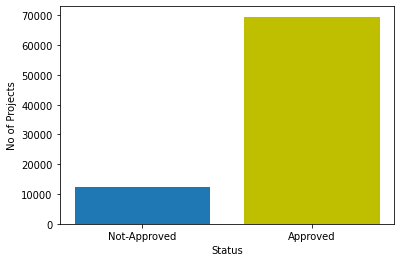

In [15]:
## Import required library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## create train,test split 
X_tr,X_test = train_test_split(ppcsd_df, test_size=0.25, random_state=42,stratify=ppcsd_df['project_is_approved'])

### check number of approved and not approved data in train file 
print("counts of label 'Approved': {}".format(sum(X_tr['project_is_approved'] == 1))) 
print("counts of label 'Not Approved': {} \n".format(sum(X_tr['project_is_approved'] == 0)))
print("Ratio of Aprroved to Not Approved :{}".format((sum(X_tr['project_is_approved'] == 1)/sum(X_tr['project_is_approved'] == 0))))
##
print("-"*100)
temp=np.unique(X_tr['project_is_approved'] ,return_counts=True)
temp = pd.Series(temp[1],index=temp[0])
ind = np.arange(len(temp))
fig, ax = plt.subplots()
ax.bar(ind, temp)
ax.set_ylabel('No of Projects')
ax.set_xlabel('Status')
ax.set_xticks(ind)
ax.set_xticklabels(['Not-Approved','Approved'])
ax.get_children()[1].set_color('y')

In [16]:
print("Total number of unique states is {}".format(X_tr['school_state'].nunique()))
print("Total number of unique prefix is {}".format(X_tr['teacher_prefix'].nunique()))
print("Total number of unique project_grade_category is {}".format(X_tr['project_grade_category'].nunique()))
print("Total number of unique clean_categories is {}".format(X_tr['clean_categories'].nunique()))
print("Total number of unique clean_categories is {}".format(X_tr['clean_subcategories'].nunique()))

Total number of unique states is 51
Total number of unique prefix is 5
Total number of unique project_grade_category is 4
Total number of unique clean_categories is 51
Total number of unique clean_categories is 397


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [17]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [18]:
## reference "https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
### Response Coding of the features
def response_coding_for_feature(X_tr_func,X_test_func,col_name='school_state',new_col='Res_Code_State' ):

    ### laplace smoothing
    k = X_tr_func[col_name].nunique()
    alpha = 0.01
    x_pos_cnt = X_tr_func.groupby(col_name)['project_is_approved'].sum()
    x_pos_cnt = x_pos_cnt.to_dict()
    total_cnt = X_tr_func.groupby(col_name)['project_is_approved'].count()
    total_cnt = total_cnt.to_dict()
    ### lpalace smoothing for all the variables
    for uniq_val in x_pos_cnt.keys():
      x = x_pos_cnt.get(uniq_val)
      n = total_cnt.get(uniq_val)
      x = (x+alpha)/(n+(k*alpha))
      x_pos_cnt[uniq_val] = x
    ## get train features variables.
    pr_df = pd.DataFrame.from_dict(x_pos_cnt,orient ='index')
    pr_df.reset_index(inplace=True,drop=False)
    pr_df['project_not_approved'] = 1 - pr_df[0]
    pos_col = new_col + '_pos'
    neg_col = new_col + '_neg'
    pr_df = pr_df.rename(columns = {'index' : col_name,
                                     0:pos_col,
                                    'project_not_approved':neg_col})
    X_tr_func = X_tr_func.merge(pr_df,left_on=col_name,right_on=col_name,how='inner')
    X_test_func = X_test_func.merge(pr_df,left_on=col_name,right_on=col_name,how='inner')
    ### fill not found state with 0.5 as the inner join will return NAN value
    X_test_func[[pos_col, neg_col]].fillna(value=0.5,inplace=True)
    return X_tr_func, X_test_func

In [19]:
X_tr,X_test = response_coding_for_feature(X_tr,X_test,col_name='school_state',new_col='Res_Code_State')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [20]:
X_tr,X_test = response_coding_for_feature(X_tr,X_test,col_name='teacher_prefix',new_col='Res_Code_tpr')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [21]:
X_tr,X_test = response_coding_for_feature(X_tr,X_test,col_name='project_grade_category',new_col='Res_Code_pgc')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [22]:
X_tr,X_test = response_coding_for_feature(X_tr,X_test,col_name='clean_categories',new_col='Res_Code_cc')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [23]:
X_tr,X_test = response_coding_for_feature(X_tr,X_test,col_name='clean_subcategories',new_col='Res_Code_csc')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [24]:
X_tr.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,essay_neg,essay_neu,essay_pos,essay_compound,Res_Code_State_pos,Res_Code_State_neg,Res_Code_tpr_pos,Res_Code_tpr_neg,Res_Code_pgc_pos,Res_Code_pgc_neg,Res_Code_cc_pos,Res_Code_cc_neg,Res_Code_csc_pos,Res_Code_csc_neg
0,ok,mr,grades_6_8,0,1,appliedlearning,charactereducation,my wonderful middle students active extremely ...,314.56,0.011,0.612,0.377,0.9915,0.825293,0.174707,0.844457,0.155543,0.842803,0.157197,0.819761,0.180239,0.796057,0.203943
1,tx,mr,grades_6_8,1,1,appliedlearning,charactereducation,real myers fc work english language learners r...,563.96,0.019,0.784,0.197,0.9803,0.814124,0.185876,0.844457,0.155543,0.842803,0.157197,0.819761,0.180239,0.796057,0.203943
2,or,mr,grades_6_8,0,0,appliedlearning,charactereducation,this strongest class yet 22 years teach their ...,469.88,0.082,0.573,0.344,0.9897,0.841213,0.158787,0.844457,0.155543,0.842803,0.157197,0.819761,0.180239,0.796057,0.203943
3,md,mrs,grades_6_8,0,1,appliedlearning,charactereducation,imagine grow little money think family your pa...,101.83,0.188,0.531,0.281,0.9777,0.833704,0.166296,0.854679,0.145321,0.842803,0.157197,0.819761,0.180239,0.796057,0.203943
4,nh,mrs,grades_6_8,4,1,appliedlearning,charactereducation,i teach language arts sixth grade students inc...,175.59,0.062,0.765,0.173,0.9719,0.876233,0.123767,0.854679,0.145321,0.842803,0.157197,0.819761,0.180239,0.796057,0.203943


In [25]:
y_tr = X_tr['project_is_approved']
X_tr = X_tr.drop('project_is_approved',axis=1)
y_test = X_test['project_is_approved']
X_test = X_test.drop('project_is_approved',axis=1)

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [26]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [27]:
### Normalize your data 
def norm_data(X_tr, y_tr, X_test, y_test, col_name = 'price'):
    
    from sklearn.preprocessing import Normalizer
    normalizer = Normalizer()

    normalizer.fit(X_tr['price'].values.reshape(1,-1))

    X_tr_norm = normalizer.transform(X_tr['price'].values.reshape(-1,1))
    X_test_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))


    print("After vectorizations")
    print(X_tr_norm.shape, y_tr.shape)
    print(X_test_norm.shape, y_test.shape)
    print("="*100)
    return X_tr_norm,X_test_norm

In [28]:
X_tr_price_norm, X_test_price_norm = norm_data(X_tr, y_tr, X_test, y_test, 'price')

After vectorizations
(81936, 1) (81936,)
(27306, 1) (27306,)


In [29]:
X_tr_nopp_norm, X_test_nopp_norm = norm_data(X_tr, y_tr, X_test, y_test, 'teacher_number_of_previously_posted_project')

After vectorizations
(81936, 1) (81936,)
(27306, 1) (27306,)


#### TF-IDF Implementation

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [31]:
def TFIDF_essays_sub(X_tr, y_tr, X_test, y_test, col_name = 'essay'):
    
    vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
    vectorizer.fit(X_tr[col_name].values) # fit has to happen only on train data

    # we use the fitted CountVectorizer to convert the text to vector
    X_tr_ohe = vectorizer.transform(X_tr[col_name].values)
    X_test_ohe = vectorizer.transform(X_test[col_name].values)

    print("After vectorizations {}".format(col_name))
    print(X_tr_ohe.shape, y_tr.shape)
    print(X_test_ohe.shape, y_test.shape)
    #print(vectorizer.get_feature_names())
    print("="*100)
    
    return X_tr_ohe, X_test_ohe, vectorizer.get_feature_names()

In [32]:
X_tr_essay_tfidf, X_test_essay_tfidf, TFIDF_feature_name = TFIDF_essays_sub(X_tr, y_tr, X_test, y_test, col_name = 'essay')

After vectorizations essay
(81936, 5000) (81936,)
(27306, 5000) (27306,)


In [33]:
## prepare your data set to train your model
from scipy.sparse import hstack
X_tr_tfidf_csr = hstack((X_tr_essay_tfidf,X_tr_nopp_norm, X_tr_price_norm,X_tr['essay_neg'].values.reshape(-1,1),
                        X_tr['essay_neu'].values.reshape(-1,1),X_tr['essay_pos'].values.reshape(-1,1),
                        X_tr['essay_compound'].values.reshape(-1,1),X_tr['Res_Code_State_pos'].values.reshape(-1,1),
                        X_tr['Res_Code_State_neg'].values.reshape(-1,1),X_tr['Res_Code_tpr_pos'].values.reshape(-1,1),
                        X_tr['Res_Code_tpr_neg'].values.reshape(-1,1),X_tr['Res_Code_pgc_pos'].values.reshape(-1,1),
                        X_tr['Res_Code_pgc_neg'].values.reshape(-1,1),X_tr['Res_Code_cc_pos'].values.reshape(-1,1),
                        X_tr['Res_Code_cc_neg'].values.reshape(-1,1),X_tr['Res_Code_csc_pos'].values.reshape(-1,1),
                        X_tr['Res_Code_csc_neg'].values.reshape(-1,1)))
##
X_test_tfidf_csr = hstack((X_test_essay_tfidf,X_test_nopp_norm, X_test_price_norm,X_test['essay_neg'].values.reshape(-1,1),
                        X_test['essay_neu'].values.reshape(-1,1),X_test['essay_pos'].values.reshape(-1,1),
                        X_test['essay_compound'].values.reshape(-1,1),X_test['Res_Code_State_pos'].values.reshape(-1,1),
                        X_test['Res_Code_State_neg'].values.reshape(-1,1),X_test['Res_Code_tpr_pos'].values.reshape(-1,1),
                        X_test['Res_Code_tpr_neg'].values.reshape(-1,1),X_test['Res_Code_pgc_pos'].values.reshape(-1,1),
                        X_test['Res_Code_pgc_neg'].values.reshape(-1,1),X_test['Res_Code_cc_pos'].values.reshape(-1,1),
                        X_test['Res_Code_cc_neg'].values.reshape(-1,1),X_test['Res_Code_csc_pos'].values.reshape(-1,1),
                        X_test['Res_Code_csc_neg'].values.reshape(-1,1)))
##
print("Final Data matrix")
print(X_tr_tfidf_csr.shape, y_tr.shape)
print(X_test_tfidf_csr.shape, y_test.shape)
print("="*100)

Final Data matrix
(81936, 5016) (81936,)
(27306, 5016) (27306,)


In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from scipy.stats import randint

In [88]:
%%time
### Train XGBoost Classifier
model_params = {
                'n_estimators': [500,750,1000,1250] ,
                'max_depth' :  [1, 3, 5, 7 ]
               }
#
xgbdt_clf = XGBClassifier(learning_rate =0.1,
                    min_child_weight=1,
                    reg_lambda = 1.5,                     
                    subsample=0.6,
                    colsample_bytree=0.6,
                    colsample_bylevel=0.8,
                    objective= 'binary:logistic',
                    nthread=4
                    )
#
clf = GridSearchCV(xgbdt_clf, model_params, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1,
                         verbose=40)
clf.fit(X_tr_tfidf_csr,y_tr,
        verbose=15)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 32

CPU times: user 7min 49s, sys: 1.31 s, total: 7min 50s
Wall time: 10h 33min 59s


In [89]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
test_auc = clf.cv_results_['mean_test_score'] 
test_auc_std = clf.cv_results_['std_test_score']

#Output of GridSearchCV
print('Best score: ',clf.best_score_)
print('Best Hyper parameters: ',clf.best_params_)
print('='*75)
print('Train AUC scores')
print(clf.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf.cv_results_['mean_test_score'])

Best score:  0.6526207037918785
Best Hyper parameters:  {'max_depth': 1, 'n_estimators': 1250}
Train AUC scores
[0.73332033 0.75181519 0.76605276 0.77789603 0.8517532  0.88655417
 0.9119096  0.93048882 0.94613544 0.9730147  0.98663968 0.99326684
 0.98826787 0.99705505 0.99927462 0.99979901]
CV AUC scores
[0.64503882 0.6488506  0.65143128 0.6526207  0.62822379 0.63091631
 0.62950553 0.62896355 0.61965915 0.62115954 0.62102054 0.61964313
 0.61546911 0.61619335 0.61483068 0.61394219]


In [90]:
'''%%time
### Train XGBoost Classifier
model_params = {
                'n_estimators': randint(50,1050),
                'max_depth' :  randint(1,12)
               }
#
eval_set = [(X_test_tfidf_csr, y_test)]
xgbdt_clf = XGBClassifier(learning_rate =0.1,
                    min_child_weight=1,
                    n_estimators = 10000,
                    reg_lambda = 0.2,                     
                    subsample=0.6,
                    colsample_bytree=0.6,
                    colsample_bylevel=0.8,
                    objective= 'binary:logistic',
                    nthread=4
                    )
#
clf = RandomizedSearchCV(xgbdt_clf, model_params, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1,
                         n_iter = 10, verbose=1, random_state = 42)
xgbdt_clf.fit(X_tr_tfidf_csr,y_tr,
        verbose=True,eval_metric="auc", eval_set=eval_set,early_stopping_rounds=100)'''

'%%time\n### Train XGBoost Classifier\nmodel_params = {\n                \'n_estimators\': randint(50,1050),\n                \'max_depth\' :  randint(1,12)\n               }\n#\neval_set = [(X_test_tfidf_csr, y_test)]\nxgbdt_clf = XGBClassifier(learning_rate =0.1,\n                    min_child_weight=1,\n                    n_estimators = 10000,\n                    reg_lambda = 0.2,                     \n                    subsample=0.6,\n                    colsample_bytree=0.6,\n                    colsample_bylevel=0.8,\n                    objective= \'binary:logistic\',\n                    nthread=4\n                    )\n#\nclf = RandomizedSearchCV(xgbdt_clf, model_params, cv=5, scoring=\'roc_auc\', return_train_score=True, n_jobs=-1,\n                         n_iter = 10, verbose=1, random_state = 42)\nxgbdt_clf.fit(X_tr_tfidf_csr,y_tr,\n        verbose=True,eval_metric="auc", eval_set=eval_set,early_stopping_rounds=100)'

In [91]:
from itertools import repeat
x1 = []
y1 = []
max_depth = [1, 3, 5, 7 ]
n_estimators =  [500,750,1000,1250]
train_auc_scores = clf.cv_results_['mean_train_score']
cv_auc_scores = clf.cv_results_['mean_test_score']

x1 = [x for item in max_depth for x in repeat(item, 4)]
for _ in max_depth:
    for item in n_estimators:
        y1.append(item)

<Figure size 3600x1440 with 0 Axes>

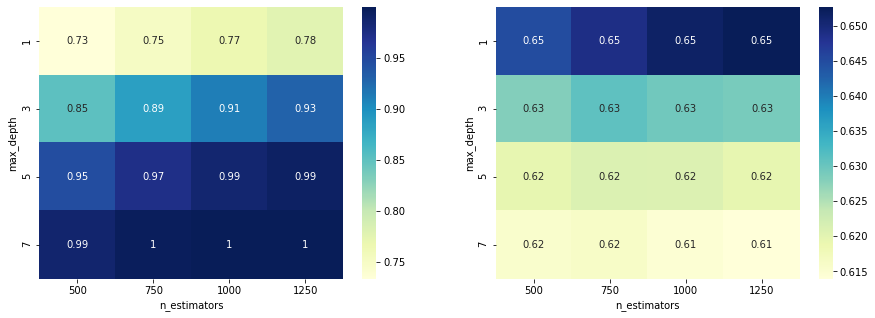

In [92]:
import seaborn as sns
df1 = pd.DataFrame(list(zip(x1,y1,train_auc))).rename(columns = {0 : 'max_depth', 1: 'n_estimators', 2: 'mean_train_score'}).pivot('max_depth','n_estimators','mean_train_score')
df2 = pd.DataFrame(list(zip(x1,y1,test_auc))).rename(columns = {0 : 'max_depth', 1: 'n_estimators', 2: 'mean_CV_score'}).pivot('max_depth','n_estimators','mean_CV_score')
plt.figure(figsize=(50,20))
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.heatmap(df1,annot=True,ax=axes[0],cbar = True ,cmap= "YlGnBu")
sns.heatmap(df2,annot=True,ax=axes[1],cbar = True ,cmap= "YlGnBu")

In [35]:
%%time
### Train XGBoost Classifier
#
xgbdt_clf = XGBClassifier(learning_rate =0.1,
                    min_child_weight=1,
                    n_estimators = 1250,
                    max_depth = 1,
                    reg_lambda = 1.5,                     
                    subsample=0.6,
                    colsample_bytree=0.6,
                    colsample_bylevel=0.8,
                    objective= 'binary:logistic',
                    verbose = 4,
                    nthread=4
                    )
xgbdt_clf.fit(X_tr_tfidf_csr,y_tr,
        verbose=True)

CPU times: user 7min 53s, sys: 1.01 s, total: 7min 54s
Wall time: 4min 11s


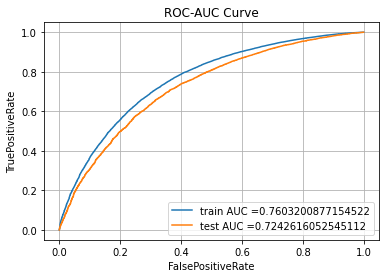

In [36]:
from sklearn.metrics import roc_curve, auc
y_train_pred = xgbdt_clf.predict_proba(X_tr_tfidf_csr)[::,1]    
y_test_pred =  xgbdt_clf.predict_proba(X_test_tfidf_csr)[::,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
auc_tfidf_train = auc(train_fpr, train_tpr)
auc_tfidf_test = auc(test_fpr, test_tpr)
### feature importance


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc_tfidf_train))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc_tfidf_test))
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title("ROC-AUC Curve")
plt.grid()
plt.show()

In [37]:
### find best threshold
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.4857056414734996 for threshold 0.834


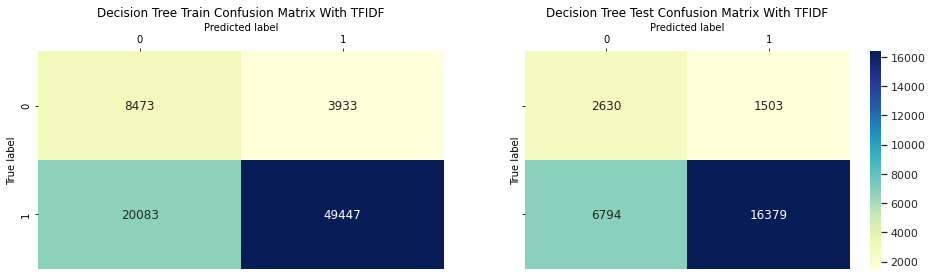

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
y_train_pred_class = predict_with_best_t(y_train_pred, best_t)
y_test_pred_class = predict_with_best_t(y_test_pred, best_t)
train_conf_mat = pd.DataFrame(confusion_matrix(y_tr, y_train_pred_class))
test_conf_mat = pd.DataFrame(confusion_matrix(y_test, y_test_pred_class))

fig, axs = plt.subplots(1,2,figsize=(16, 4),sharey=True)
sns.set(font_scale=1)
f1 = sns.heatmap(train_conf_mat, annot=True,fmt="d", ax=axs[0], cbar = False ,cmap= "YlGnBu") 

f1.set_title('Decision Tree Train Confusion Matrix With TFIDF')
f1.set_ylabel('True label')
f1.set_xlabel('Predicted label')
f1.xaxis.set_ticks_position('top')
f1.xaxis.set_label_position('top')

f2 = sns.heatmap(test_conf_mat, annot=True, fmt = 'd', ax=axs[1] , cmap = "YlGnBu") 
f2.set_title('Decision Tree Test Confusion Matrix With TFIDF')
f2.set_ylabel('True label')
f2.set_xlabel('Predicted label')
f2.xaxis.set_ticks_position('top')
f2.xaxis.set_label_position('top')

#### TFIDF Word2Vec Implementation
### Weighted TFIDF Word2Vec Implementation

In [40]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_tr['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [41]:
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [42]:
tfidf_w2v_tr_vector = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_tr['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_tr_vector.append(vector)

print(len(tfidf_w2v_tr_vector))
print(len(tfidf_w2v_tr_vector[0]))


81936
300


In [43]:
tfidf_w2v_test_vector = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_vector.append(vector)

print(len(tfidf_w2v_test_vector))
print(len(tfidf_w2v_test_vector[0]))


27306
300


In [44]:
tfidf_w2v_tr_vector = np.array(tfidf_w2v_tr_vector)
tfidf_w2v_test_vector = np.array(tfidf_w2v_test_vector)
tfidf_w2v_test_vector.shape

(27306, 300)

In [46]:
## prepare your data set to train your model
from scipy.sparse import hstack
tfidf_w2v_tr_vector = np.array(tfidf_w2v_tr_vector)
tfidf_w2v_test_vector = np.array(tfidf_w2v_test_vector)
X_tr_tfidf_csr = np.concatenate((tfidf_w2v_tr_vector,X_tr_nopp_norm, X_tr_price_norm,X_tr['essay_neg'].values.reshape(-1,1),
                        X_tr['essay_neu'].values.reshape(-1,1),X_tr['essay_pos'].values.reshape(-1,1),
                        X_tr['essay_compound'].values.reshape(-1,1),X_tr['Res_Code_State_pos'].values.reshape(-1,1),
                        X_tr['Res_Code_State_neg'].values.reshape(-1,1),X_tr['Res_Code_tpr_pos'].values.reshape(-1,1),
                        X_tr['Res_Code_tpr_neg'].values.reshape(-1,1),X_tr['Res_Code_pgc_pos'].values.reshape(-1,1),
                        X_tr['Res_Code_pgc_neg'].values.reshape(-1,1),X_tr['Res_Code_cc_pos'].values.reshape(-1,1),
                        X_tr['Res_Code_cc_neg'].values.reshape(-1,1),X_tr['Res_Code_csc_pos'].values.reshape(-1,1),
                        X_tr['Res_Code_csc_neg'].values.reshape(-1,1)),axis=1)
##
X_test_tfidf_csr = np.concatenate((tfidf_w2v_test_vector,X_test_nopp_norm, X_test_price_norm,X_test['essay_neg'].values.reshape(-1,1),
                        X_test['essay_neu'].values.reshape(-1,1),X_test['essay_pos'].values.reshape(-1,1),
                        X_test['essay_compound'].values.reshape(-1,1),X_test['Res_Code_State_pos'].values.reshape(-1,1),
                        X_test['Res_Code_State_neg'].values.reshape(-1,1),X_test['Res_Code_tpr_pos'].values.reshape(-1,1),
                        X_test['Res_Code_tpr_neg'].values.reshape(-1,1),X_test['Res_Code_pgc_pos'].values.reshape(-1,1),
                        X_test['Res_Code_pgc_neg'].values.reshape(-1,1),X_test['Res_Code_cc_pos'].values.reshape(-1,1),
                        X_test['Res_Code_cc_neg'].values.reshape(-1,1),X_test['Res_Code_csc_pos'].values.reshape(-1,1),
                        X_test['Res_Code_csc_neg'].values.reshape(-1,1)),axis=1)
##
print("Final Data matrix")
print(X_tr_tfidf_csr.shape, y_tr.shape)
print(X_test_tfidf_csr.shape, y_test.shape)
print("="*100)

Final Data matrix
(81936, 316) (81936,)
(27306, 316) (27306,)


In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from scipy.stats import randint

In [48]:
%%time
### Train XGBoost Classifier
model_params = {
                'n_estimators': [500,750,1000,1250] ,
                'max_depth' :  [1, 3, 5, 7 ]
               }
#
xgbdt_clf = XGBClassifier(learning_rate =0.1,
                    min_child_weight=1,
                    reg_lambda = 1.5,                     
                    subsample=0.6,
                    colsample_bytree=0.6,
                    colsample_bylevel=0.8,
                    objective= 'binary:logistic',
                    nthread=4
                    )
#
clf = GridSearchCV(xgbdt_clf, model_params, cv=4, scoring='roc_auc', return_train_score=True, n_jobs=-1,
                         verbose=40)
clf.fit(X_tr_tfidf_csr,y_tr,
        verbose=15)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 43

CPU times: user 4min 12s, sys: 1.64 s, total: 4min 13s
Wall time: 10h 1min 11s


In [49]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
test_auc = clf.cv_results_['mean_test_score'] 
test_auc_std = clf.cv_results_['std_test_score']

#Output of GridSearchCV
print('Best score: ',clf.best_score_)
print('Best Hyper parameters: ',clf.best_params_)
print('='*75)
print('Train AUC scores')
print(clf.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf.cv_results_['mean_test_score'])

Best score:  0.6595321051912355
Best Hyper parameters:  {'max_depth': 1, 'n_estimators': 500}
Train AUC scores
[0.71808331 0.72901735 0.73786103 0.74487395 0.83175945 0.86648936
 0.8936044  0.9148107  0.97425734 0.99407334 0.9990021  0.99987501
 0.99998869 0.9999986  0.99999897 0.99999921]
CV AUC scores
[0.65953211 0.65787609 0.65742014 0.65611589 0.62980352 0.62508153
 0.62360175 0.62074369 0.61552483 0.61274121 0.61208374 0.61204082
 0.61513557 0.61513565 0.61655365 0.6167116 ]


In [50]:
from itertools import repeat
x1 = []
y1 = []
max_depth = [1, 3, 5, 7 ]
n_estimators =  [500,750,1000,1250]
train_auc_scores = clf.cv_results_['mean_train_score']
cv_auc_scores = clf.cv_results_['mean_test_score']

x1 = [x for item in max_depth for x in repeat(item, 4)]
for _ in max_depth:
    for item in n_estimators:
        y1.append(item)

<Figure size 3600x1440 with 0 Axes>

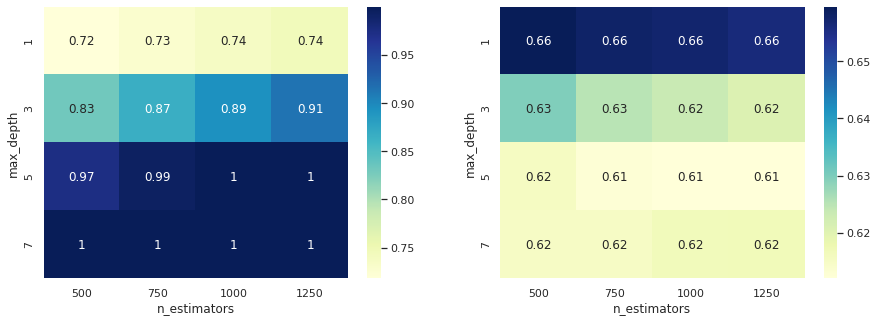

In [51]:
import seaborn as sns
df1 = pd.DataFrame(list(zip(x1,y1,train_auc))).rename(columns = {0 : 'max_depth', 1: 'n_estimators', 2: 'mean_train_score'}).pivot('max_depth','n_estimators','mean_train_score')
df2 = pd.DataFrame(list(zip(x1,y1,test_auc))).rename(columns = {0 : 'max_depth', 1: 'n_estimators', 2: 'mean_CV_score'}).pivot('max_depth','n_estimators','mean_CV_score')
plt.figure(figsize=(50,20))
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.heatmap(df1,annot=True,ax=axes[0],cbar = True ,cmap= "YlGnBu")
sns.heatmap(df2,annot=True,ax=axes[1],cbar = True ,cmap= "YlGnBu")

In [52]:
%%time
### Train XGBoost Classifier
#
xgbdt_clf = XGBClassifier(learning_rate =0.1,
                    min_child_weight=1,
                    n_estimators = 500,
                    max_depth = 1,
                    reg_lambda = 1.5,                     
                    subsample=0.6,
                    colsample_bytree=0.6,
                    colsample_bylevel=0.8,
                    objective= 'binary:logistic',
                    verbose = 4,
                    nthread=4
                    )
xgbdt_clf.fit(X_tr_tfidf_csr,y_tr,
        verbose=True)

CPU times: user 4min 7s, sys: 921 ms, total: 4min 8s
Wall time: 2min 11s


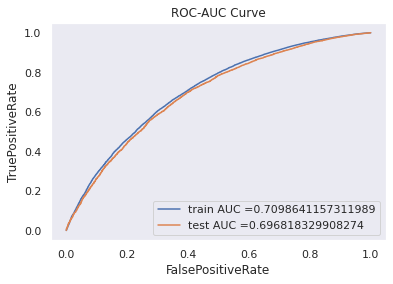

In [53]:
from sklearn.metrics import roc_curve, auc
y_train_pred = xgbdt_clf.predict_proba(X_tr_tfidf_csr)[::,1]    
y_test_pred =  xgbdt_clf.predict_proba(X_test_tfidf_csr)[::,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
auc_tfidf_train = auc(train_fpr, train_tpr)
auc_tfidf_test = auc(test_fpr, test_tpr)
### feature importance


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc_tfidf_train))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc_tfidf_test))
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title("ROC-AUC Curve")
plt.grid()
plt.show()

In [54]:
### find best threshold
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.42973514692127257 for threshold 0.841


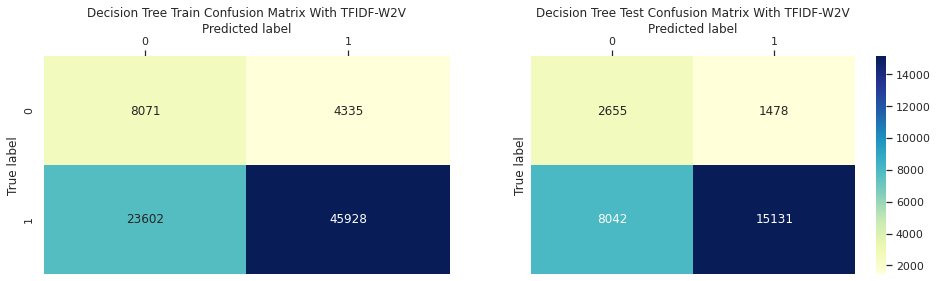

In [55]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
y_train_pred_class = predict_with_best_t(y_train_pred, best_t)
y_test_pred_class = predict_with_best_t(y_test_pred, best_t)
train_conf_mat = pd.DataFrame(confusion_matrix(y_tr, y_train_pred_class))
test_conf_mat = pd.DataFrame(confusion_matrix(y_test, y_test_pred_class))

fig, axs = plt.subplots(1,2,figsize=(16, 4),sharey=True)
sns.set(font_scale=1)
f1 = sns.heatmap(train_conf_mat, annot=True,fmt="d", ax=axs[0], cbar = False ,cmap= "YlGnBu") 

f1.set_title('Decision Tree Train Confusion Matrix With TFIDF-W2V')
f1.set_ylabel('True label')
f1.set_xlabel('Predicted label')
f1.xaxis.set_ticks_position('top')
f1.xaxis.set_label_position('top')

f2 = sns.heatmap(test_conf_mat, annot=True, fmt = 'd', ax=axs[1] , cmap = "YlGnBu") 
f2.set_title('Decision Tree Test Confusion Matrix With TFIDF-W2V')
f2.set_ylabel('True label')
f2.set_xlabel('Predicted label')
f2.xaxis.set_ticks_position('top')
f2.xaxis.set_label_position('top')

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

In [57]:
from prettytable import PrettyTable
model = ['TFIDF','TFIDFWord2Vec']
max_depth = [1,1]
n_estimators = [1250,500]
train_auc = [0.76,0.724]
test_auc = [0.71,0.696]
x = PrettyTable()
x.field_names = ['Model','Max_Depth','n_estimators','Train_AUC',"Test_AUC"]
for i in range(2):
  x.add_row([model[i],max_depth[i],n_estimators[i],train_auc[i],test_auc[i]])
print(x)

+---------------+-----------+--------------+-----------+----------+
|     Model     | Max_Depth | n_estimators | Train_AUC | Test_AUC |
+---------------+-----------+--------------+-----------+----------+
|     TFIDF     |     1     |     1250     |    0.76   |   0.71   |
| TFIDFWord2Vec |     1     |     500      |   0.724   |  0.696   |
+---------------+-----------+--------------+-----------+----------+
